In [51]:
%pip install openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [52]:
df = pd.read_excel('./data/Gorev2-Abone-Tuketim-Veriseti.xlsx')

In [53]:
df.head(5)

,DonemYil,DonemAy,abone_id,abone_adres_sehir,abone_yas_grup,data_tuketim_gb,arama_tuketim_dk,sms_tuketim_adet
0,2025,Eylül,81806878,Konya,40-60,13.405,134,25
1,2025,Eylül,21999017,Edirne,15-25,3.962,10,18
2,2025,Eylül,37796365,İstanbul,25-40,10.977,147,2
3,2025,Eylül,79723041,İstanbul,40-60,10.900,138,14
4,2025,Eylül,14532637,Mersin,40-60,10.403,144,5


In [54]:
df.isnull().sum() # veri analiz edileblilir

DonemYil             0
DonemAy              0
abone_id             0
abone_adres_sehir    0
abone_yas_grup       0
data_tuketim_gb      0
arama_tuketim_dk     0
sms_tuketim_adet     0
dtype: int64

In [55]:
abone_sehir = df['abone_adres_sehir'].value_counts()
abone_sehir

İstanbul    361
Ankara      140
İzmir        97
Antalya      77
Bursa        62
           ... 
Iğdır         3
Ardahan       2
Kilis         2
Erzincan      1
Tunceli       1
Name: abone_adres_sehir, Length: 80, dtype: int64

In [56]:
df.info() #frame tablomuzu inceledik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DonemYil           1999 non-null   int64  
 1   DonemAy            1999 non-null   object 
 2   abone_id           1999 non-null   int64  
 3   abone_adres_sehir  1999 non-null   object 
 4   abone_yas_grup     1999 non-null   object 
 5   data_tuketim_gb    1999 non-null   float64
 6   arama_tuketim_dk   1999 non-null   int64  
 7   sms_tuketim_adet   1999 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 125.1+ KB


In [57]:
df.head() # default olarak ilk 5 satıra göz attık

,DonemYil,DonemAy,abone_id,abone_adres_sehir,abone_yas_grup,data_tuketim_gb,arama_tuketim_dk,sms_tuketim_adet
0,2025,Eylül,81806878,Konya,40-60,13.405,134,25
1,2025,Eylül,21999017,Edirne,15-25,3.962,10,18
2,2025,Eylül,37796365,İstanbul,25-40,10.977,147,2
3,2025,Eylül,79723041,İstanbul,40-60,10.900,138,14
4,2025,Eylül,14532637,Mersin,40-60,10.403,144,5


In [58]:
df.describe() #describe fonksiyonu ile çeşitli aritmetiksel işlemleri otomatik olarak gördük

,DonemYil,abone_id,data_tuketim_gb,arama_tuketim_dk,sms_tuketim_adet
count,1999.0,1.999000e+03,1999.000000,1999.000000,1999.000000
mean,2025.0,5.290682e+07,12.772172,143.322161,14.671836
std,0.0,2.180807e+07,7.790180,99.879303,8.621119
min,2025.0,1.437150e+07,0.125000,6.000000,0.000000
25%,2025.0,3.410505e+07,6.409000,90.500000,7.000000
50%,2025.0,5.316932e+07,11.302000,130.000000,15.000000
75%,2025.0,7.221418e+07,19.345000,215.000000,22.000000
max,2025.0,8.972179e+07,31.281000,426.000000,29.000000


In [59]:
internet_mean = df["data_tuketim_gb"].mean()
call_mean = df["arama_tuketim_dk"].mean()
sms_mean = df["sms_tuketim_adet"].mean()

In [60]:
packages = {
    "Paket 1":[10,500,100],
    "Paket 2":[25,1000,250],
    "Paket 3":[40,2000,500],
}

In [70]:
averages = [internet_mean,call_mean,sms_mean]

In [71]:
ratio_data = []
for name,values in packages.items():
    average_internet = internet_mean / values[0]
    average_call = call_mean / values[1]
    average_sms = sms_mean / values[2]
    
    print(f"{name}: İnternet={average_internet:.2f}, Arama={average_call:.2f}, SMS={average_sms:.2f}")
    averageS = [average_internet, average_call, average_sms]
    
    ratio_data.append([name] + averageS)


    


Paket 1: İnternet=1.28, Arama=0.29, SMS=0.15
Paket 2: İnternet=0.51, Arama=0.14, SMS=0.06
Paket 3: İnternet=0.32, Arama=0.07, SMS=0.03


In [72]:
#paket 1 -> internet ortalamaya göre %128 kullanılmış dolayısıyla bu paket yetersiz
#paket 2 -> internet %50 civarlarında ve yaklaşık yarısı kullanılmış bu da ideal dengede olduğunu gösterir
#paket 3 -> internet %30 küsürlerde olduğundan dolayı bunun fiyatı fazla gelecek ve gereksiz pahalı olacaktır

In [73]:
ratios_df = pd.DataFrame(ratio_data, columns=["Paket", "Internet", "Arama", "SMS"])
print(ratios_df)

     Paket  Internet     Arama       SMS
0  Paket 1  1.277217  0.286644  0.146718
1  Paket 2  0.510887  0.143322  0.058687
2  Paket 3  0.319304  0.071661  0.029344


In [76]:
# Ortalama hesapla
ratios_df["Ortalama"] = ratios_df[["Internet", "Arama", "SMS"]].mean(axis=1)

# Paket aşımı (herhangi bir oran > 1) varsa diskalifiye et
uygunlar = ratios_df[(ratios_df[["Internet", "Arama", "SMS"]] <= 1).all(axis=1)].copy()

if uygunlar.empty:
    en_uygun_index = ratios_df["Internet"].idxmin()  # internet en düşük oranlı olan
else:
    uygunlar["fark"] = abs(1 - uygunlar["Ortalama"])
    en_uygun_index = uygunlar["fark"].idxmin()

onerilen_paket = ratios_df.loc[en_uygun_index, "Paket"]
print("Önerilen paket:", onerilen_paket)


Önerilen paket: Paket 2


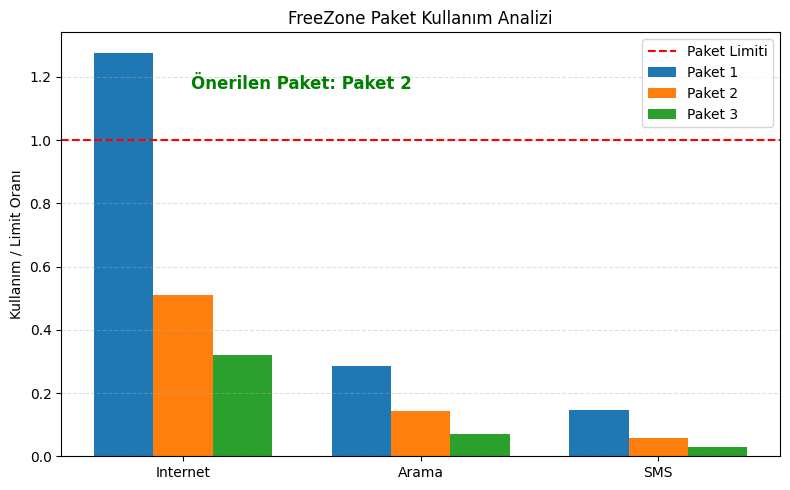

In [81]:
categories = ["Internet", "Arama", "SMS"]
x = np.arange(len(categories))
width = 0.25

plt.figure(figsize=(8,5))

# Her paketi ayrı ayrı çizdik
for i, row in enumerate(ratios_df.itertuples()):
    plt.bar(x + (i - 1) * width, [row.Internet, row.Arama, row.SMS],
            width, label=row.Paket)
#sınır gösterimi
plt.axhline(1, color='red', linestyle='--', label='Paket Limiti')

plt.xticks(x, categories)
plt.ylabel("Kullanım / Limit Oranı")
plt.title("FreeZone Paket Kullanım Analizi")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.text(
    0.5, 1.15, 
    f"Önerilen Paket: {onerilen_paket}", 
    ha='center', va='bottom', 
    fontsize=12, color='green', fontweight='bold'
)
plt.tight_layout()

plt.savefig("charts/freezone_package_analysis.png", dpi=300, bbox_inches="tight")
plt.show()